In [2]:
import bayesopt
import numpy as np
from functools import partial

import matplotlib.pyplot as plt

In [3]:
def f(x):
    return x*np.sin(x)

In [4]:
# %%timeit
BO = bayesopt.BayesOpt(f=f,
                       initial_input=np.array([0.]),
                       acq=bayesopt.acquisition.LCB,
                       acq_optim=partial(bayesopt.acquisition_optimizer.AcquisitionSLSQPOptimizer,
                                         bounds=np.array([0,18])))
BO.run_optim(50)

/usr/local/lib/python3.7/site-packages/jax/lib/xla_bridge.py:119: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')
BayesOpt: 100%|██████████| 50/50 [00:27<00:00,  1.80it/s, param:[11.14249079], value:-11.022454617672523, current best param:[17.34037027], current best_value:-17.307469737476495]


# GPyOpt

In [5]:
import GPyOpt

In [6]:
bounds = [{'name': 'x1', 'type': 'continuous', 'domain': (0,18)}]
myBopt = GPyOpt.methods.BayesianOptimization(f=f, X=np.array([[0.]]),domain=bounds,acquisition_type='LCB',)
myBopt.run_optimization(max_iter=50,eps=0)

## vs

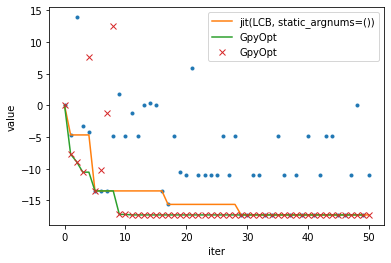

In [7]:
bayesopt.plot_history(BO)
# plt.yscale('log')
plt.plot([np.min(myBopt.Y[:i+1]) for i in range(50)],label='GpyOpt')
plt.plot(myBopt.Y,'x',label='GpyOpt')
plt.legend()

# Speed test


In [9]:
BO = bayesopt.BayesOpt(f=f,
                       initial_input=np.array([0.]),
                       acq=partial(bayesopt.acquisition.scheduledLCB,kappa=15.),
                       acq_optim=partial(bayesopt.acquisition_optimizer.AcquisitionSLSQPOptimizer,
                                         bounds=np.array([0,18])))
%time BO.run_optim(50)

BayesOpt: 100%|██████████| 50/50 [00:06<00:00,  7.87it/s, param:[11.030011], value:-11.02347147318897, current best param:[17.33480288], current best_value:-17.30758699814659]    


CPU times: user 7.58 s, sys: 10.3 s, total: 17.8 s
Wall time: 6.36 s


In [12]:
bounds = [{'name': 'x1', 'type': 'continuous', 'domain': (0,18)}]
myBopt = GPyOpt.methods.BayesianOptimization(f=f, X=np.array([[0]]),domain=bounds,acquisition_type='LCB')
%time myBopt.run_optimization(max_iter=50,eps=0)

CPU times: user 45.9 s, sys: 22.2 s, total: 1min 8s
Wall time: 17.8 s


In [13]:
17./6.36

2.6729559748427674

低い次元ならGridで20倍くらい。   
同じアルゴリズム(L-BFGS)だと3倍程度. GpyOptのようにGrad入れたらもっと早いかも?